## Observations and Insights 

In [2]:
#Propriva treatment resulted in fewer timepoints suggesting that maybe more mice did not survive long term. Tumor volume was largest infubinol treatment. l1509 tumor shrunk over time.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df= pd.merge(mouse_metadata, study_results, how="inner",on =['Mouse ID'])
# Display the data table for preview
complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice.
complete_df.nunique()['Mouse ID']

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pd.DataFrame(complete_df.groupby(['Mouse ID', 'Timepoint']).filter(lambda x:len(x)>1)['Mouse ID'].unique())


,0
0,g989


In [24]:
# Optional: Get all the data for the duplicate mouse ID
complete_df.groupby(['Mouse ID', 'Timepoint']).filter(lambda x:len(x)>1)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df=complete_df.set_index('Mouse ID').drop('g989',axis=0).reset_index()

In [26]:
# Checking the number of mice in the clean DataFrame.
df.nunique()['Mouse ID']

248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_regimen= df.groupby('Drug Regimen')
frame= {
    'Mean':group_regimen['Tumor Volume (mm3)'].mean(),
    'Median':group_regimen['Tumor Volume (mm3)'].median(),
    'Variance':group_regimen['Tumor Volume (mm3)'].var(),
    'Standard Deviation':group_regimen['Tumor Volume (mm3)'].std(),
    'SEM':group_regimen['Tumor Volume (mm3)'].sem(),
}
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_stats=pd.DataFrame(frame)
tumor_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(["mean","median", "var", "std", 'sem'])
# This method produces everything in a single groupby function


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

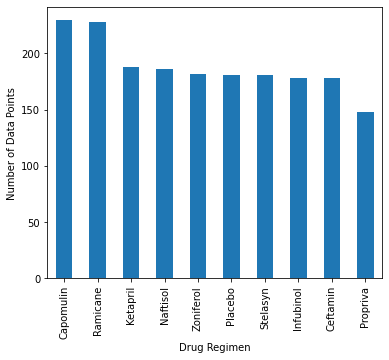

In [35]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
x=df['Drug Regimen'].unique()
y=group_regimen['Mouse ID'].count()
adf=pd.DataFrame({'Number Of Mice':y},index=x).sort_values(['Number Of Mice'],ascending=False)
ax=adf.plot.bar(figsize=(6,5),xlabel='Drug Regimen', ylabel='Number of Data Points',legend=False)


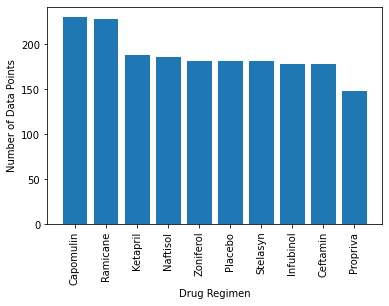

In [37]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x=adf.index
y=adf.values[:,0]
fig=plt.figure()
plt.bar(x,y)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)
plt.show()


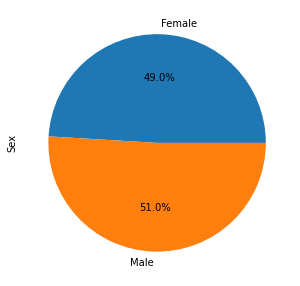

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gs=df.groupby(['Sex'])
adf=pd.DataFrame(gs.count()['Mouse ID'])
adf.plot.pie(y='Mouse ID',figsize=(5,5),legend=False,ylabel='Sex',autopct='%1.1f%%')


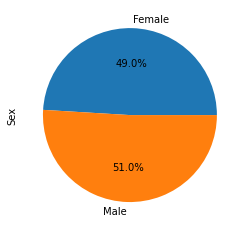

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x=adf.values[:,0]
y=adf.index.to_list()
fig=plt.figure()
plt.ylabel('Sex')
plt.pie(x,labels=y,autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mt=pd.DataFrame(df.groupby(['Mouse ID']).max()['Timepoint'])
mt.columns=['Max Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mdf=pd.merge(df, mt, how="inner",on =['Mouse ID'])
ndf=mdf[(mdf['Timepoint']==mdf['Max Timepoint'])&(mdf['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol', 'Ceftamin']))].sort_values(['Drug Regimen', 'Mouse ID'])[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
ndf

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
309,b128,Capomulin,45,38.982878
299,b742,Capomulin,45,38.939633
64,f966,Capomulin,20,30.485985
244,g288,Capomulin,45,37.074024
360,g316,Capomulin,45,40.159220
...,...,...,...,...
59,s508,Ramicane,45,30.276232
410,u196,Ramicane,45,40.667713
449,w678,Ramicane,5,43.166373
453,y449,Ramicane,15,44.183451


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin','Ramicane','Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorvaldata=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    pdf=ndf[ndf['Drug Regimen']==treatment]
    
    # add subset 
    tumorvaldata.append(pdf['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    q1=pdf['Tumor Volume (mm3)'].quantile(0.25)
    q3=pdf['Tumor Volume (mm3)'].quantile(0.75)
    IQR=q3-q1
    lowquebond=q1-1.5*IQR
    highquebond=q3+1.5*IQR

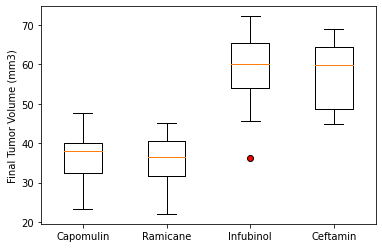

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig=plt.figure()
plt.boxplot(tumorvaldata,labels=treatments,flierprops={'markerfacecolor':'red'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

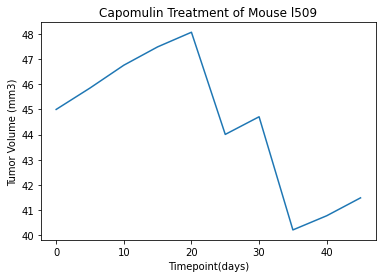

In [47]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
l509=df[df['Mouse ID']=='l509'].sort_values('Timepoint')[['Timepoint','Tumor Volume (mm3)']]
x=l509['Timepoint']
y=l509.values[:,1]
fig=plt.figure()
plt.plot(x,y)
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')
plt.show()

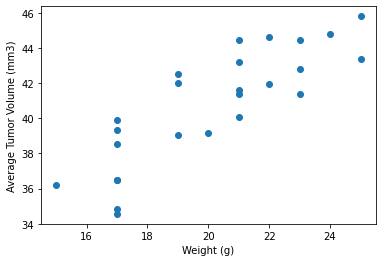

In [48]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weights=df[df['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean()[['Weight (g)','Tumor Volume (mm3)']]
x=weights['Weight (g)']
y=weights.values[:,1]

fig=plt.figure()
plt.plot(x,y,'o',label='Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

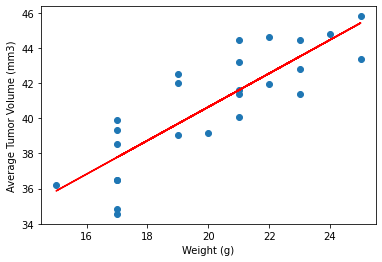

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope,intercept,rvalue,pvalue,std_err=st.linregress(x,y)
fig=plt.figure()
plt.plot(x,y,'o',label='Weight (g)')
plt.plot(x,intercept+slope*x,'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()